In [1]:
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# <b>Part 1: Prepare the Data</b>

In [2]:
# Import the CSV file.
file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# List the dataframe's data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
 14  MYOPIC     618 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 72.5 KB


In [4]:
# Drop Myopic column from the dataset.
df = df.drop(columns=["MYOPIC"])
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
# Find any null values.
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values.")


Column AGE has 0 null values.
Column SPHEQ has 0 null values.
Column AL has 0 null values.
Column ACD has 0 null values.
Column LT has 0 null values.
Column VCD has 0 null values.
Column SPORTHR has 0 null values.
Column READHR has 0 null values.
Column COMPHR has 0 null values.
Column STUDYHR has 0 null values.
Column TVHR has 0 null values.
Column DIOPTERHR has 0 null values.
Column MOMMY has 0 null values.
Column DADMY has 0 null values.


In [6]:
# Find any duplicate entries.
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


In [7]:
# Save cleaned data.
file_path = Path("myopia_cleaned.csv")
df.to_csv(file_path, index=False)

# <b>Part 2: Apply Dimensionality Reduction</b>

In [8]:
# Load preprocessed dataset.
file_path = Path("myopia_cleaned.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [9]:
# Standardize data using StandardScaler.
myopia_scaled = StandardScaler().fit_transform(df_myopia)
print(myopia_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [10]:
# Apply PCA to reduce dimensions to 0.99.

# Initialize PCA model.
pca = PCA(n_components=0.99)

# Get principal components for the data.
myopia_pca = pca.fit_transform(myopia_scaled)

In [11]:
# Transform the PCA data to a dataframe.
df_myopia_pca = pd.DataFrame(data=myopia_pca, columns=["principal 1", "principal 2", "principal 3", "principal 4", "principal 5", "principal 6", "principal 7", "principal 8", "principal 9", "principal 10", "principal 11", "principal 12"])
df_myopia_pca.head()

,principal 1,principal 2,principal 3,principal 4,principal 5,principal 6,principal 7,principal 8,principal 9,principal 10,principal 11,principal 12
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-1.389112,-0.574909
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-0.118153,0.527492
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-0.287739,0.128478
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0.652956,-0.672679
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0.007640,0.995370


In [12]:
# Find the explained variance.
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566,
       0.04286506, 0.03839767])

In [13]:
# Look at a sample of the pca data.
df_myopia_pca.sample(10)

,principal 1,principal 2,principal 3,principal 4,principal 5,principal 6,principal 7,principal 8,principal 9,principal 10,principal 11,principal 12
268,-1.730885,-0.562320,0.914048,0.003602,0.511528,0.104578,1.882490,0.657641,-0.877629,0.970281,0.093643,0.148880
11,2.317522,-3.126687,-0.676081,0.645000,-0.429726,-0.023854,1.769011,-0.737437,0.884816,0.094009,1.444995,-0.456858
427,1.496326,1.174890,-0.914232,-0.223634,0.164546,-1.508099,-1.047529,-0.890825,-0.810563,0.880142,0.255730,0.942541
509,-2.574882,-0.086261,0.348308,1.477053,-0.379447,1.244374,0.337833,0.643994,-0.455931,0.118855,-0.069863,0.233911
293,-2.441025,-0.298417,0.911020,0.370471,0.335544,-0.110808,0.343415,0.599741,-1.297349,0.117791,-0.155109,0.612584
195,0.472770,1.186792,-0.579153,-0.033979,-1.700015,0.222250,2.055805,0.493067,0.085008,-1.105898,-0.324421,-0.128452
165,0.696932,-0.500995,2.118654,0.451629,0.286946,-0.511784,-2.352312,1.097761,-1.479682,-0.324904,0.473799,-0.223296
417,1.341956,-2.667901,-0.517000,-0.796449,-1.717576,0.355494,-0.388422,0.348528,-0.956544,0.317074,1.545167,0.239650
461,-0.807313,-1.669931,0.089026,0.764107,-1.107868,1.154668,-0.997325,-0.283347,-0.941360,0.268494,-0.327699,0.259248
39,-0.280699,-0.701516,-0.933868,0.827278,-0.637413,0.928837,0.201634,1.044606,-1.397340,-0.462444,0.342115,0.672634


In [36]:
# Create a new dataframe for t-SNE.
df2 = df_myopia_pca
labels = df_myopia_pca["principal 1"]

# Initialize a t-SNE model.
tsne = TSNE(learning_rate=35)

# Reduce dimensions
tsne_features = tsne.fit_transform(df2)

# The dataset has 2 columns.
tsne_features.shape

(618, 2)

In [18]:
# Prepare to plot the dataset.

# The first column of transformed features.
df2["x"] = tsne_features[:,0]

# The second column of transformed features.
df2["y"] = tsne_features[:,1]

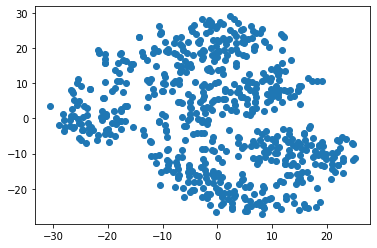

In [19]:
# Visualize the clusters.
plt.scatter(df2["x"], df2["y"])
plt.show()

In [20]:
# Examine the value counts of the label.
labels.value_counts()

 0.535503    1
-1.610324    1
 3.741311    1
 0.394280    1
 1.276468    1
            ..
 0.357104    1
-1.422541    1
 0.658424    1
 1.725987    1
-0.691534    1
Name: principal 1, Length: 618, dtype: int64

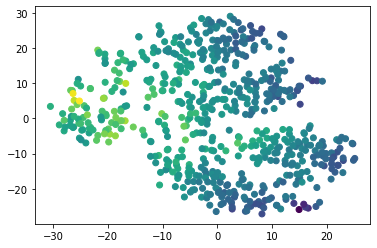

In [21]:
# Visualize the clusters with color.
plt.scatter(df2["x"], df2["y"], c=labels)
plt.show()

### <b>PCA/t-SNE Analysis:</b> There are no distinct clusters in the dataset.

# <b>Part 3: Perform a Cluster Analysis with K-means.</b>

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\A

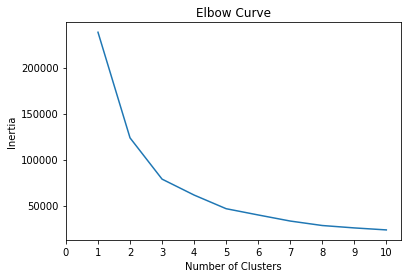

In [25]:
# Find the best value for k.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values.
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Create the elbow curve.
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.xticks(list(range(11)))
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

### <b>Results:</b> Possible elbows at k=5 and k=8.

### Analyzing possible elbow at k=5.

In [32]:
# Predicting clusters with k=5.

# Initialize the k-means model.
model5 = KMeans(n_clusters=5, random_state=0)

# Fit the model.
model5.fit(df_myopia_pca)

# Predict clusters.
predictions5 = model5.predict(df_myopia_pca)

# Add the predicted class column to the dataframe.
df_myopia_pca["class"] = model5.labels_
df_myopia_pca.head()

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,principal 1,principal 2,principal 3,principal 4,principal 5,principal 6,principal 7,principal 8,principal 9,principal 10,principal 11,principal 12,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-1.389112,-0.574909,-14.285704,23.163084,3
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-0.118153,0.527492,0.351328,19.305357,3
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-0.287739,0.128478,-2.301989,-14.791692,2
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0.652956,-0.672679,16.925091,-2.083136,4
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0.007640,0.995370,-2.633732,5.479305,0


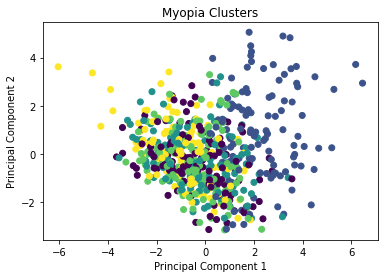

In [33]:
# Visualize the clusters.
plt.scatter(x=df_myopia_pca["principal 1"], y=df_myopia_pca["principal 2"], c=df_myopia_pca["class"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Myopia Clusters")
plt.show()

### <b>K=5 Analysis:</b> There are no distinct clusters.

### Analyzing possible elbow at k=8.

In [34]:
# Predicting clusters with k=8.

# Initialize the k-means model.
model8 = KMeans(n_clusters=8, random_state=0)

# Fit the model.
model8.fit(df_myopia_pca)

# Predict clusters.
predictions = model8.predict(df_myopia_pca)

# Add the predicted class column to the dataframe.
df_myopia_pca["class"] = model8.labels_
df_myopia_pca.head()


d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,principal 1,principal 2,principal 3,principal 4,principal 5,principal 6,principal 7,principal 8,principal 9,principal 10,principal 11,principal 12,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-1.389112,-0.574909,-14.285704,23.163084,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-0.118153,0.527492,0.351328,19.305357,6
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-0.287739,0.128478,-2.301989,-14.791692,4
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0.652956,-0.672679,16.925091,-2.083136,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0.007640,0.995370,-2.633732,5.479305,3


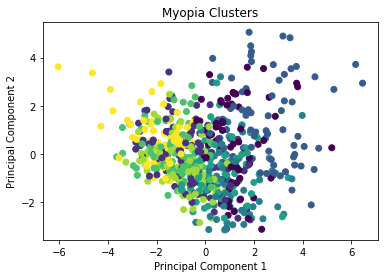

In [35]:
# Visualize the clusters.
plt.scatter(x=df_myopia_pca["principal 1"], y=df_myopia_pca["principal 2"], c=df_myopia_pca["class"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Myopia Clusters")
plt.show()

### <b>K=8 Analysis:</b> There are no distinct clusters.

# <b>Part 4: Make a Recommendation</b>

### <b>Results:</b> Neither the t-SNE nor K-means models are able to provide distinct clusters to predict whether a child will develop myopia.

### <b>Analysis:</b> As the dataset contains 12-14 variables (depending on the algorithm being tested), the algorithms must attempt to make complex predictions.  However, the dataset itself contains only 617 samples, which most likely contributes to the inability to find sufficient patterns to make predictions.  This failure is ultimately likely the result of a woefully inadequate sample size.

### <b>Recommendation:</b> The patients cannot be distinctly clustered, likely because the sample size is too small to provide enough data to train the models for prediction.  Either a larger dataset should be used or more data must be gathered.  The models can then be reapplied to look for patterns to make prediction possible.